In [1]:
# Image from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --quiet -U --no-cache-dir gdown --pre
!pip install --quiet nlp-id
!pip install --quiet emoji
!pip install --quiet imblearn
!pip install --quiet gensim
!pip install --quiet shap
!pip install --quiet lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [9]:
# from nlp_id.stopword import StopWord
# from nlp_id.postag import PosTag
# from nlp_id.lemmatizer import Lemmatizer

import emoji
import string
import re
import shap
import lime
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K

# import nltk

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# nltk.download('punkt')

import seaborn as sns # untuk visualisasi
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# potongan kode di bawah adalah agar gambar graph yang 
# dihasilkan mempunyai kualitas yang cukup baik
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [11]:
abusive_lexicon = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/abusive.csv', encoding='latin-1')
dataset = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/re_dataset.csv', encoding='latin-1')
kamus_alay = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/kamusalay.csv', encoding='latin-1')
potensi_bias = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/potensi_bias.csv', encoding='latin-1')

features_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/extracted_feature.csv', encoding='latin-1')

In [20]:
# df = tweet_df.loc[:, ('Jokowi', 'Exclamation', 'Abusive', 'HS')]
df = features_df.loc[:, features_df.columns != 'Tweet']
df = df.loc[:, df.columns != 'Unnamed: 0']

In [21]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

X = df.loc[:, df.columns != 'HS']
y = df['HS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Prepares a default instance of the random forest regressor
# model = RandomForestRegressor()
# Fits the model on the data
# model.fit(X_train, y_train)

model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=0.1)

In [22]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 660it [01:57,  5.13it/s]


In [23]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


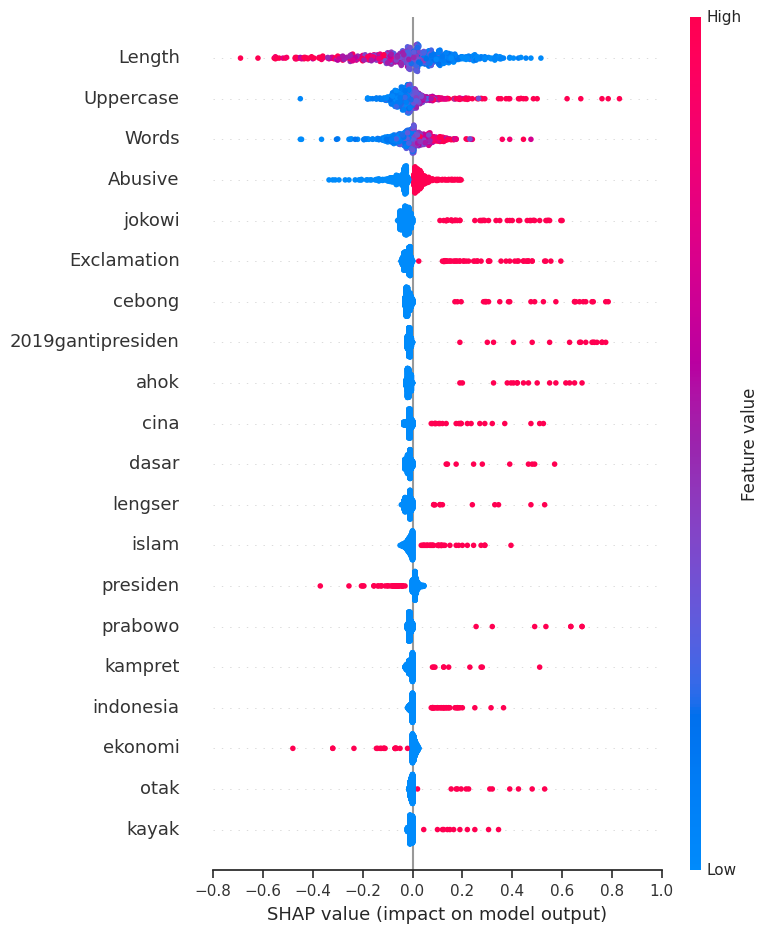

In [24]:
shap.summary_plot(shap_values)